# Text extraction

This notebook is to experiment on extracting text from PDFs so that images can be assigned correct names.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pdfreader

In [3]:
file_name = "Bestiary2.pdf"
fd = open(file_name, "rb")
doc = pdfreader.PDFDocument(fd)

In [4]:
print(doc.root.Type)
print(doc.root.Metadata.Subtype)
print(doc.root.Outlines.First['Title'])

Catalog
XML
b'Front Cover'


In [5]:
def get_image_from_key(key, page, width_bounds = [200, 1260], height_bounds = [200, 1635]):
    xobj = page.Resources.XObject[key]
    try:
        pil_image = xobj.to_Pillow()
    except IndexError:
        return None
    w, h = pil_image.size
    print(w, h)
    if w < width_bounds[1] and w > width_bounds[0]:
        if h < height_bounds[1] and h > height_bounds[0]:
            return pil_image
    return None

In [6]:
for i, page in enumerate(doc.pages()):
    if i == 9:
        break
print(page.Resources.XObject.keys())

['Im5', 'Im1', 'Im2', 'Im6', 'Im4', 'Im3', 'Im0']


889 870


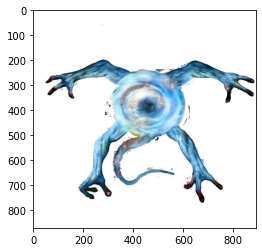

In [7]:
im = get_image_from_key("Im3", page)
if im is not None:
    plt.imshow(im)
else:
    print("im is None")

In [8]:
viewer = pdfreader.SimplePDFViewer(fd)

In [9]:
viewer.render()

In [11]:
all_page_images = viewer.canvas.images
print(all_page_images.keys())

dict_keys(['Im0', 'Im1', 'Im2', 'Im3', 'Im4', 'Im5', 'Im6', 'Im7', 'Im8', 'Im9'])


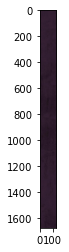

In [13]:
im0 = all_page_images["Im0"]
image = im0.to_Pillow()
plt.imshow(image)

In [18]:
markdown = viewer.canvas.text_content

In [20]:
viewer.canvas.strings[:3]

['', '', '1300325']